<a href="https://colab.research.google.com/github/namankabadi/TASK_03_Sales_Prediction_Using_PYTHON_ML/blob/main/TASK_03_SALES_PREDICTION_USING_PYTHON_ML_TECHNIQUES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 03 : SALES PREDICTION USING PYTHON AND MACHINE LEARNING:**




Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.
Linear regression model to predict Sales using an appropriate predictor variable.

A product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product. So let's start the task of sales prediction with machine learning using Python.





**AUTHOR : NAMAN KABADI**

**PROJECT NAME : SALES PREDICTION USING PYTHON MACHINE LEARNING**

**COMPANY: OASIS INFOBYTE**

**Role: Data Science Intern**


**Duration : 1-08-2023 to 30-8-2023**



**IMPORTING LIBRARIES:**

In [130]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [131]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

In [132]:
# Read the given CSV file, and view some sample records

advertising = pd.read_csv("https://github.com/namankabadi/TASK_03_Sales_Prediction_Using_PYTHON_ML/raw/main/Advertising.csv")

advertising = advertising.drop(columns = ['Unnamed: 0'])

In [133]:
advertising.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [134]:
# To check the dimension of the data
advertising.shape

(200, 4)

In [135]:
# To check the info of the data
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [136]:
# Summary statistics of a dataset
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# **Data Visualization :**
Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to Sales.

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='TV', ylabel='Sales'>

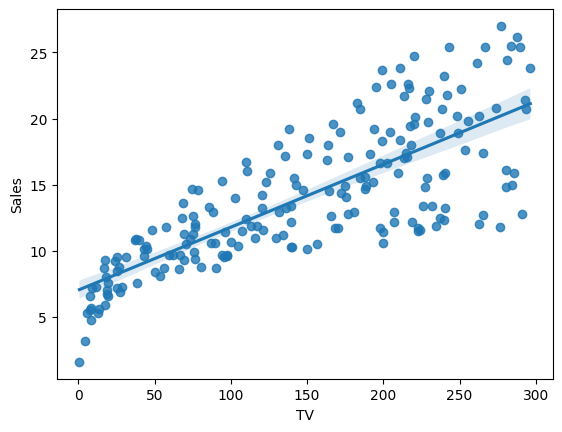

In [138]:
sns.regplot(data = advertising, x = 'TV', y = 'Sales')

<Axes: xlabel='Newspaper', ylabel='Sales'>

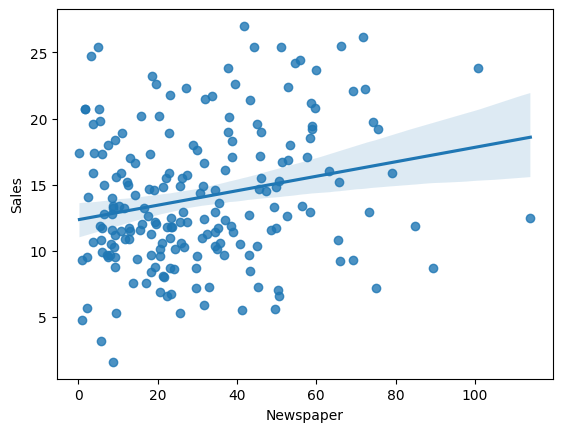

In [139]:
# To view individual Plots
sns.regplot(data = advertising, x = 'Newspaper', y = 'Sales')

<Axes: xlabel='Radio', ylabel='Sales'>

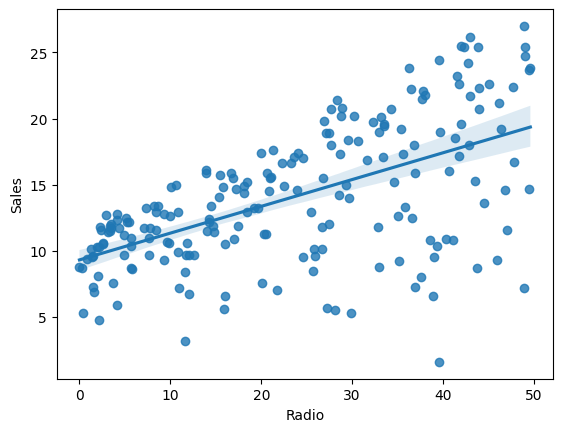

In [140]:
sns.regplot(data = advertising, x = 'Radio', y = 'Sales')


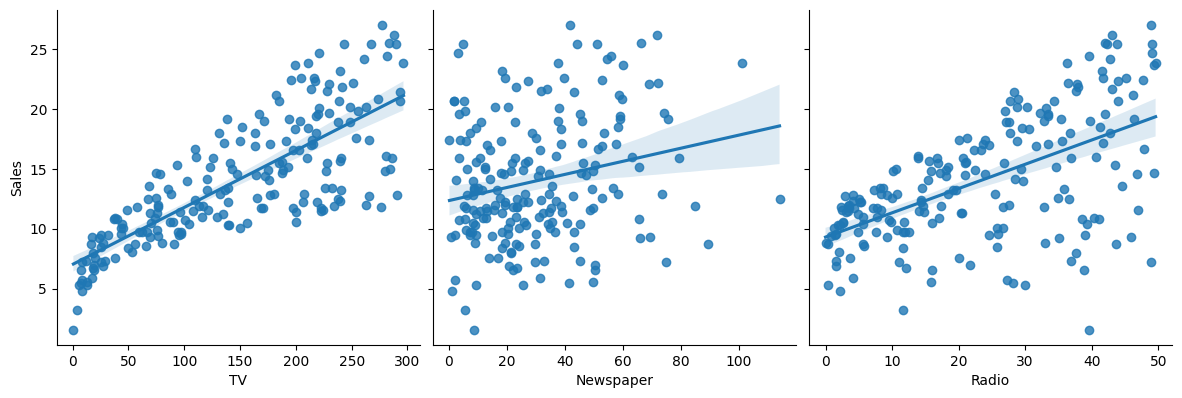

In [141]:
# To view multiple plots
# By default it takes scatter plot
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales',size=4, aspect=1, kind= 'reg' )
plt.show()

In [142]:
# To check the co-relation
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


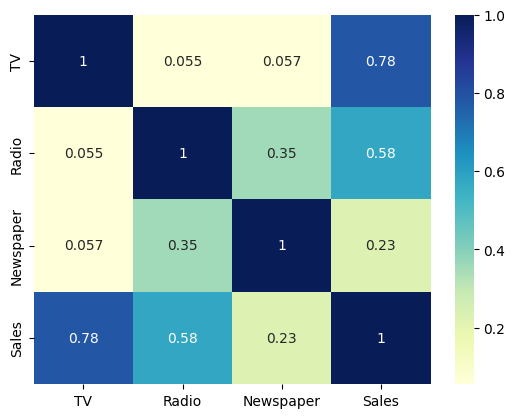

In [143]:
# Heatmap:
#A heatmap is a graphical representation of data where individual values within a matrix are represented using colors
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot= True)
plt.show()

As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So let's go ahead and perform simple linear regression using TV as our feature variable.

# **Performing Simple Linear Regression**
Equation of linear regression

Y=C+M1*X1+M2*X2+....+Mn*Xn

Where:



1.   Y is the response
2.   C is the intercept
3.   M1 is the coefficient for the first feature
4.   Mn is the coefficient for the nth feature

In in our case :
y=c+m1 X TV

The m values are called** model coefficients or model parameters**


We can build a linear regression model using statsmodel and sklearn, First we shall build a LR model using statsmodel
General Steps to build a model -

-create x and y

-create train and test sets (70, 30) (80, 20)

-Train / Build your model using training set (to learn the coefficients)

-Evaluate your model using (training set, testing set)



**Generic Steps in model building using statsmodels**

We first assign the feature variable, TV, in this case, to the variable X and the response variable, Sales, to the variable y.

In [144]:
X = advertising['TV']
y = advertising['Sales']

**Train-Test Split**

You now need to split our variable into training and testing sets. You'll perform this by importing train_test_split from the sklearn.model_selection library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)


In [146]:
# To check the shape
print(X_train.shape)
print(X_test.shape)

(140,)
(60,)


In [147]:
# Let's now take a look at the train dataset

X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [148]:
y_train.head()

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: Sales, dtype: float64

**Building a Linear Model**

We first need to import the statsmodel.api library using which we'll perform the linear regression.

In [149]:
import statsmodels.api as sm


By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order to have an intercept, we need to manually use the add_constant attribute of statsmodels. And once we've added the constant to our X_train dataset, we can go ahead and fit a regression line using the OLS (Ordinary Least Squares) attribute of statsmodels as shown below:

In [150]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [151]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [152]:
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [153]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    6.989666
TV       0.046497
dtype: float64

In [154]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           2.84e-30
Time:                        13:51:29   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.0

**Looking at some key statistics from the summary**

The values we are concerned with are -

The coefficients and significance (p-values)
R-squared
F statistic and its significance
1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance.

2. R - squared is 0.80
Meaning that  around 80.0% of the variance in Sales is explained by TV

This is a decent R-squared value.

3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

SALES = 6.98+0.04 X TV



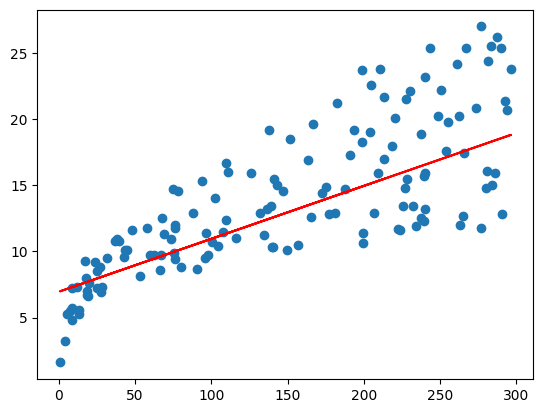

In [155]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.04*X_train, 'r')
plt.show()

**Residual analysis**

To validate assumptions of the model, and hence the reliability for inference

**Distribution of the error terms:**

We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [156]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

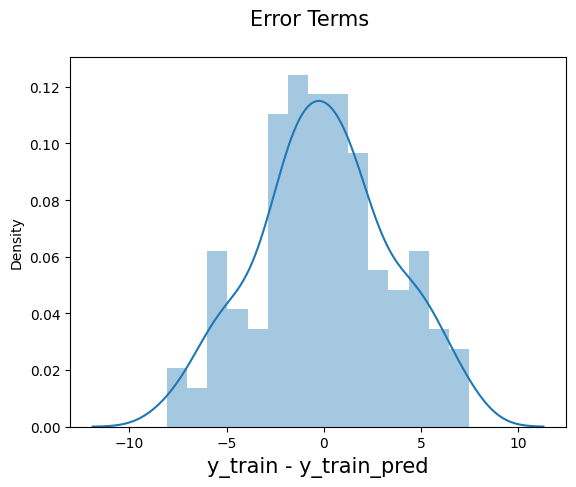

In [157]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0.

**Looking for patterns in the residuals**

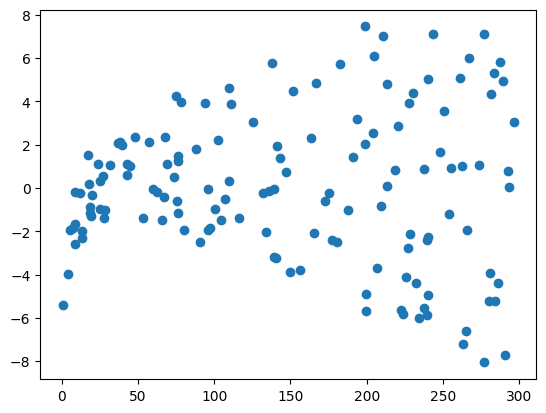

In [158]:
plt.scatter(X_train,res)
plt.show()

**Predictions on the Test Set**

Now that we have fitted a regression line on our train dataset, it's time to make some predictions on the test data. For this, we first need to add a constant to the X_test data like we did for X_train and then we can simply go on and predict the y values corresponding to X_test using the predict attribute of the fitted regression line.

In [159]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [160]:
y_pred.head()

126     7.352345
104    18.065337
99     13.276109
92     17.112141
111    18.228077
dtype: float64

In [161]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [162]:
#Looking at the RMSE
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.8241456288327003

In [163]:
#Checking the R-squared on the test set
r_squared = r2_score(y_test, y_pred)
r_squared


0.5942987267783303

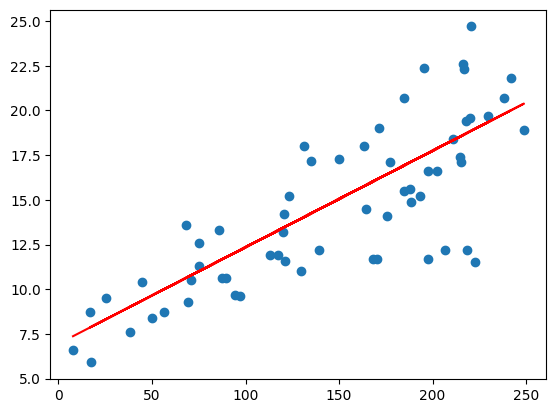

In [164]:
# Visualizing the fit on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

**Linear Regression using linear_model in sklearn**

Apart from statsmodels, there is another package namely sklearn that can be used to perform linear regression. We will use the linear_model library from sklearn to build the model. Since, we hae already performed a train-test split, we don't need to do it again.

There's one small step that we need to add, though. When there's only a single feature, we need to add an additional column in order for the linear regression fit to be performed successfully.

In [165]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)
X_train_lm.shape

(140,)

In [166]:
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

In [167]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_train_lm, y_train_lm)


LinearRegression()

In [168]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = lm.predict(X_test_lm)

# Calculate accuracy metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 7.98
R-squared Score: 0.59


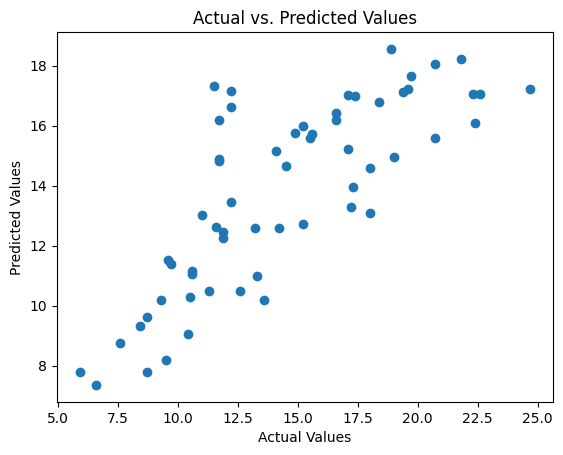

In [169]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


This plot will help us visualize how well our model's predictions match the actual target values.

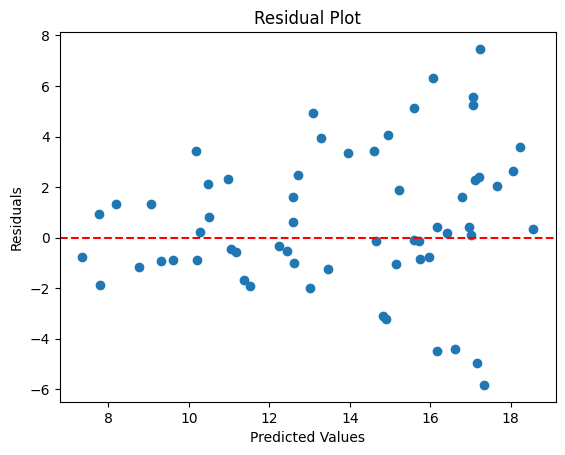

In [170]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


This plot shows the distribution of the differences between the actual and predicted values, also known as residuals. It can help us identify patterns in the residuals and assess the model's performance.

In [171]:
print(lm.intercept_)
print(lm.coef_)

#The equationwe get is the same as what we got before!

6.98966585741168
[0.04649736]


# **Conclusion**

In this project, we developed a sales prediction system using a Linear Regression model to forecast sales based on a set of features. Our analysis and model training were conducted on a dataset containing historical sales data and corresponding features.

**Key Findings:**

Model Performance:
Our Linear Regression model demonstrated reasonable predictive capabilities for the sales prediction task. The Mean Squared Error (MSE) of 7.98 and the R-squared (R2) score of 0.59 indicated **Acceptable** model performance.

**Feature Importance:**

Through the analysis of feature importances, we identified that [TV] had the most significant impact on sales predictions. This knowledge could guide business decisions and resource allocation.
